# Parkinson's Disease Case Study

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at - https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.

<u>Steps to be followed:</u>

#### 1. Load the dataset

In [1]:
import warnings;
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
pkd_full = pd.read_csv("parkinsons.csv")

#### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [4]:
pkd_full.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
pkd_full.columns = pkd_full.columns.str.lower()
pkd_full.columns = pkd_full.columns.str.replace(pat=':',repl='_')
pkd_full.columns = pkd_full.columns.str.replace(pat='(',repl='_')
pkd_full.columns = pkd_full.columns.str.replace(pat=')',repl='')
pkd_full.columns = pkd_full.columns.str.replace(pat='%',repl='perc')

In [6]:
pkd_full.columns

Index(['name', 'mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz', 'mdvp_jitter_perc',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')

In [7]:
pkd_full.head().transpose()

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
mdvp_fo_hz,119.992,122.4,116.682,116.676,116.014
mdvp_fhi_hz,157.302,148.65,131.111,137.871,141.781
mdvp_flo_hz,74.997,113.819,111.555,111.366,110.655
mdvp_jitter_perc,0.00784,0.00968,0.0105,0.00997,0.01284
mdvp_jitter_abs,7e-05,8e-05,9e-05,9e-05,0.00011
mdvp_rap,0.0037,0.00465,0.00544,0.00502,0.00655
mdvp_ppq,0.00554,0.00696,0.00781,0.00698,0.00908
jitter_ddp,0.01109,0.01394,0.01633,0.01505,0.01966
mdvp_shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


In [8]:
pkd_full.shape

(195, 24)

In [9]:
pkd_full.select_dtypes(exclude=['float64','int64']).columns

Index(['name'], dtype='object')

In [10]:
pkd = pkd_full.drop(columns='name')

In [11]:
pkd.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
pkd.isnull().any()

mdvp_fo_hz          False
mdvp_fhi_hz         False
mdvp_flo_hz         False
mdvp_jitter_perc    False
mdvp_jitter_abs     False
mdvp_rap            False
mdvp_ppq            False
jitter_ddp          False
mdvp_shimmer        False
mdvp_shimmer_db     False
shimmer_apq3        False
shimmer_apq5        False
mdvp_apq            False
shimmer_dda         False
nhr                 False
hnr                 False
status              False
rpde                False
dfa                 False
spread1             False
spread2             False
d2                  False
ppe                 False
dtype: bool

#### 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [13]:
# Univariate Analysis

pkd_desc = pd.DataFrame(pkd.describe().transpose())
pkd_desc['mean_plus_3std'] = pkd_desc['mean'] + (3 * pkd_desc['std'])
pkd_desc['outlier_check'] = np.where(pkd_desc['mean_plus_3std'] < pkd_desc['max'],1,0)
pkd_desc

,count,mean,std,min,25%,50%,75%,max,mean_plus_3std,outlier_check
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,278.398835,0
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,471.579561,1
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,246.888870,0
mdvp_jitter_perc,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,0.020765,1
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,0.000148,1
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,0.012210,1
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,0.011723,1
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,0.036630,1
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,0.086280,1
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,0.866883,1


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

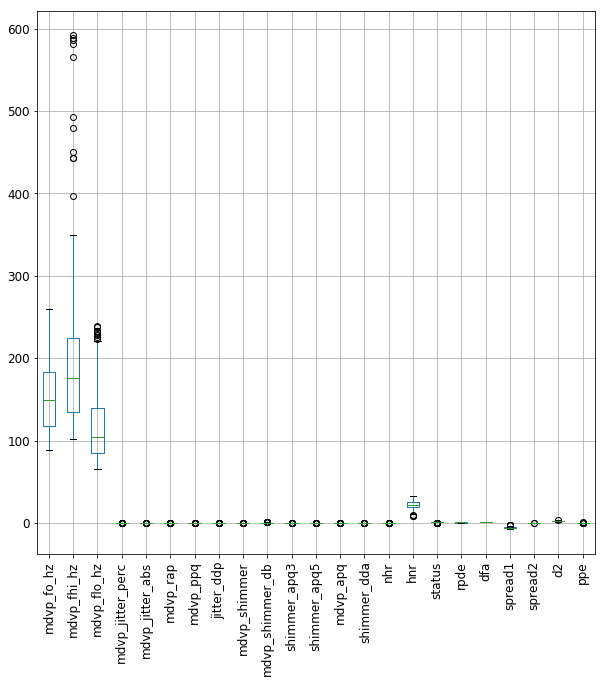

In [15]:
pkd.boxplot(fontsize=12,rot=90,figsize=[10,10])

In [16]:
from sklearn import preprocessing as pp

In [17]:
x = pkd.drop(columns='status')
y = pkd.status
x = x.apply(pp.minmax_scale)
x_desc = x.describe().transpose()
x_desc['mean_plus_3std'] = x_desc['mean'] + (3 * x_desc['std'])
x_desc['outlier_check'] = np.where(x_desc['mean_plus_3std'] < x_desc['max'],1,0)
x_desc

,count,mean,std,min,25%,50%,75%,max,mean_plus_3std,outlier_check
mdvp_fo_hz,195.0,0.383623,0.240959,0.0,0.170220,0.351961,0.549775,1.0,1.106501,0
mdvp_fhi_hz,195.0,0.193841,0.186761,0.0,0.066786,0.150411,0.249162,1.0,0.754125,1
mdvp_flo_hz,195.0,0.292748,0.250564,0.0,0.108323,0.223606,0.429160,1.0,1.044439,0
mdvp_jitter_perc,195.0,0.144233,0.154007,0.0,0.056544,0.103558,0.180591,1.0,0.606254,1
mdvp_jitter_abs,195.0,0.146083,0.137636,0.0,0.051383,0.090909,0.209486,1.0,0.558991,1
mdvp_rap,195.0,0.126513,0.142956,0.0,0.047206,0.087669,0.151975,1.0,0.555382,1
mdvp_ppq,195.0,0.135389,0.147855,0.0,0.050375,0.094855,0.162647,1.0,0.578954,1
jitter_ddp,195.0,0.126504,0.142934,0.0,0.047279,0.087494,0.151951,1.0,0.555306,1
mdvp_shimmer,195.0,0.184126,0.172147,0.0,0.063584,0.122604,0.258764,1.0,0.700565,1
mdvp_shimmer_db,195.0,0.162080,0.160129,0.0,0.052177,0.111750,0.217749,1.0,0.642468,1


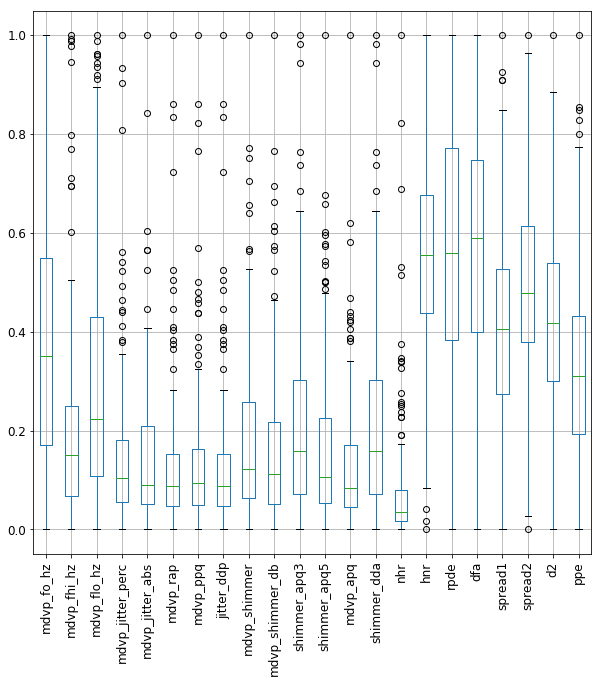

In [18]:
x.boxplot(fontsize=12,rot=90,figsize=[10,10])

In [19]:
# Bivariate Analysis
# 1. Correlation:
pkd_corr = pkd.corr()
pkd_corr_analysis = pd.DataFrame(columns=['col_name','high_corr_ind'])
col_name = []
high_corr_ind = []
for i in range(0,len(pkd.columns)):
    col_name.append(pkd_corr.columns[i])
    high_corr_ind.append(pkd_corr.where((pkd_corr>=0.7) & (pkd_corr<1)).iloc[:,i:i+1].notna().any().values)
pkd_corr_analysis['col_name'] = col_name
pkd_corr_analysis['high_corr_ind'] = high_corr_ind
print("Complete Correlation Analysis:")
pkd_corr_analysis

Complete Correlation Analysis:


,col_name,high_corr_ind
0,mdvp_fo_hz,[False]
1,mdvp_fhi_hz,[False]
2,mdvp_flo_hz,[False]
3,mdvp_jitter_perc,[True]
4,mdvp_jitter_abs,[True]
5,mdvp_rap,[True]
6,mdvp_ppq,[True]
7,jitter_ddp,[True]
8,mdvp_shimmer,[True]
9,mdvp_shimmer_db,[True]


In [20]:
print("Features with correlationg higher than 0.7:")
pkd_corr.where((pkd_corr>=0.9) & (pkd_corr<1))

Features with correlationg higher than 0.7:


,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_perc,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
mdvp_fo_hz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_fhi_hz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_flo_hz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_jitter_perc,NaN,NaN,NaN,NaN,0.935714,0.990276,0.974256,0.990276,NaN,NaN,...,NaN,0.906959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_jitter_abs,NaN,NaN,NaN,0.935714,NaN,0.922911,NaN,0.922913,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_rap,NaN,NaN,NaN,0.990276,0.922911,NaN,0.957317,1.000000,NaN,NaN,...,NaN,0.919521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_ppq,NaN,NaN,NaN,0.974256,NaN,0.957317,NaN,0.957319,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitter_ddp,NaN,NaN,NaN,0.990276,0.922913,1.000000,0.957319,NaN,NaN,NaN,...,NaN,0.919548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987258,...,0.987626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdvp_shimmer_db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987258,NaN,...,0.963202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print("High correlation of MDVP Jitter% with other features:")
pkd_corr.where((pkd_corr>=0.93) & (pkd_corr<1)).mdvp_jitter_perc

High correlation of MDVP Jitter% with other features:


mdvp_fo_hz               NaN
mdvp_fhi_hz              NaN
mdvp_flo_hz              NaN
mdvp_jitter_perc         NaN
mdvp_jitter_abs     0.935714
mdvp_rap            0.990276
mdvp_ppq            0.974256
jitter_ddp          0.990276
mdvp_shimmer             NaN
mdvp_shimmer_db          NaN
shimmer_apq3             NaN
shimmer_apq5             NaN
mdvp_apq                 NaN
shimmer_dda              NaN
nhr                      NaN
hnr                      NaN
status                   NaN
rpde                     NaN
dfa                      NaN
spread1                  NaN
spread2                  NaN
d2                       NaN
ppe                      NaN
Name: mdvp_jitter_perc, dtype: float64

In [22]:
print("High correlation of MDVP Shimmer with other features:")
pkd_corr.where((pkd_corr>=0.93) & (pkd_corr<1)).mdvp_shimmer

High correlation of MDVP Shimmer with other features:


mdvp_fo_hz               NaN
mdvp_fhi_hz              NaN
mdvp_flo_hz              NaN
mdvp_jitter_perc         NaN
mdvp_jitter_abs          NaN
mdvp_rap                 NaN
mdvp_ppq                 NaN
jitter_ddp               NaN
mdvp_shimmer             NaN
mdvp_shimmer_db     0.987258
shimmer_apq3        0.987625
shimmer_apq5        0.982835
mdvp_apq            0.950083
shimmer_dda         0.987626
nhr                      NaN
hnr                      NaN
status                   NaN
rpde                     NaN
dfa                      NaN
spread1                  NaN
spread2                  NaN
d2                       NaN
ppe                      NaN
Name: mdvp_shimmer, dtype: float64

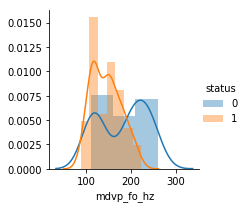

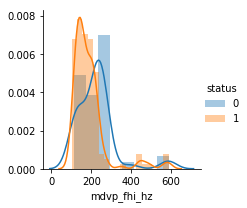

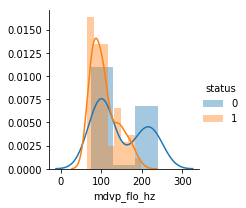

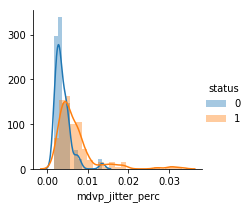

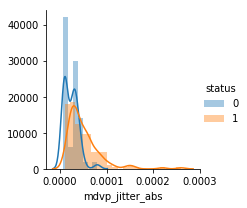

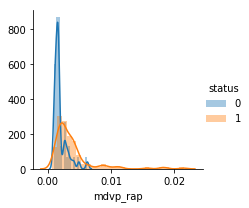

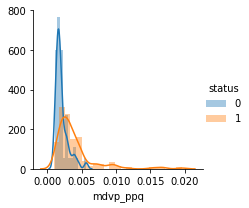

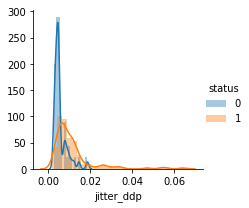

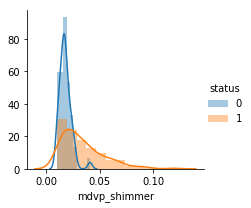

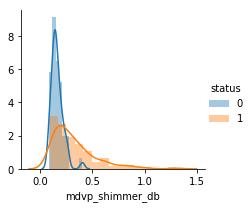

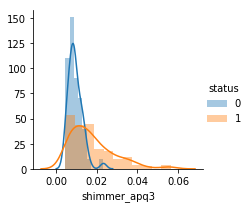

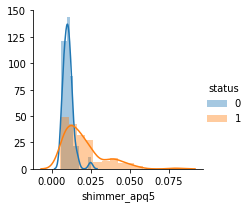

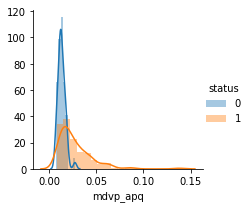

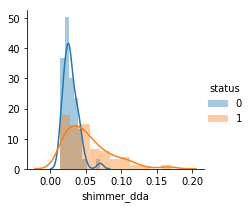

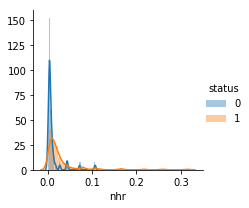

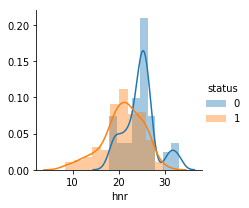

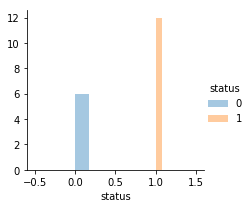

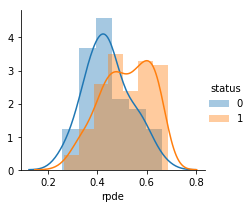

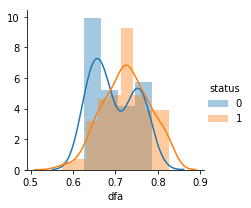

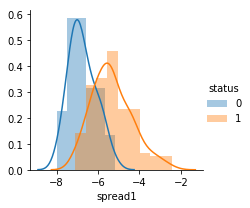

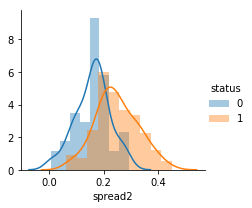

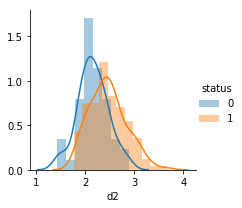

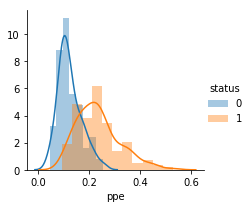

In [23]:
# 2. Comparing the Dependent - Category Variable to all Independent - Continous Variables using Distribution Plot

for i in range(0,len(pkd.columns)):
    sb.FacetGrid(data=pkd,hue='status').map(sb.distplot,pkd.columns[i]).add_legend()

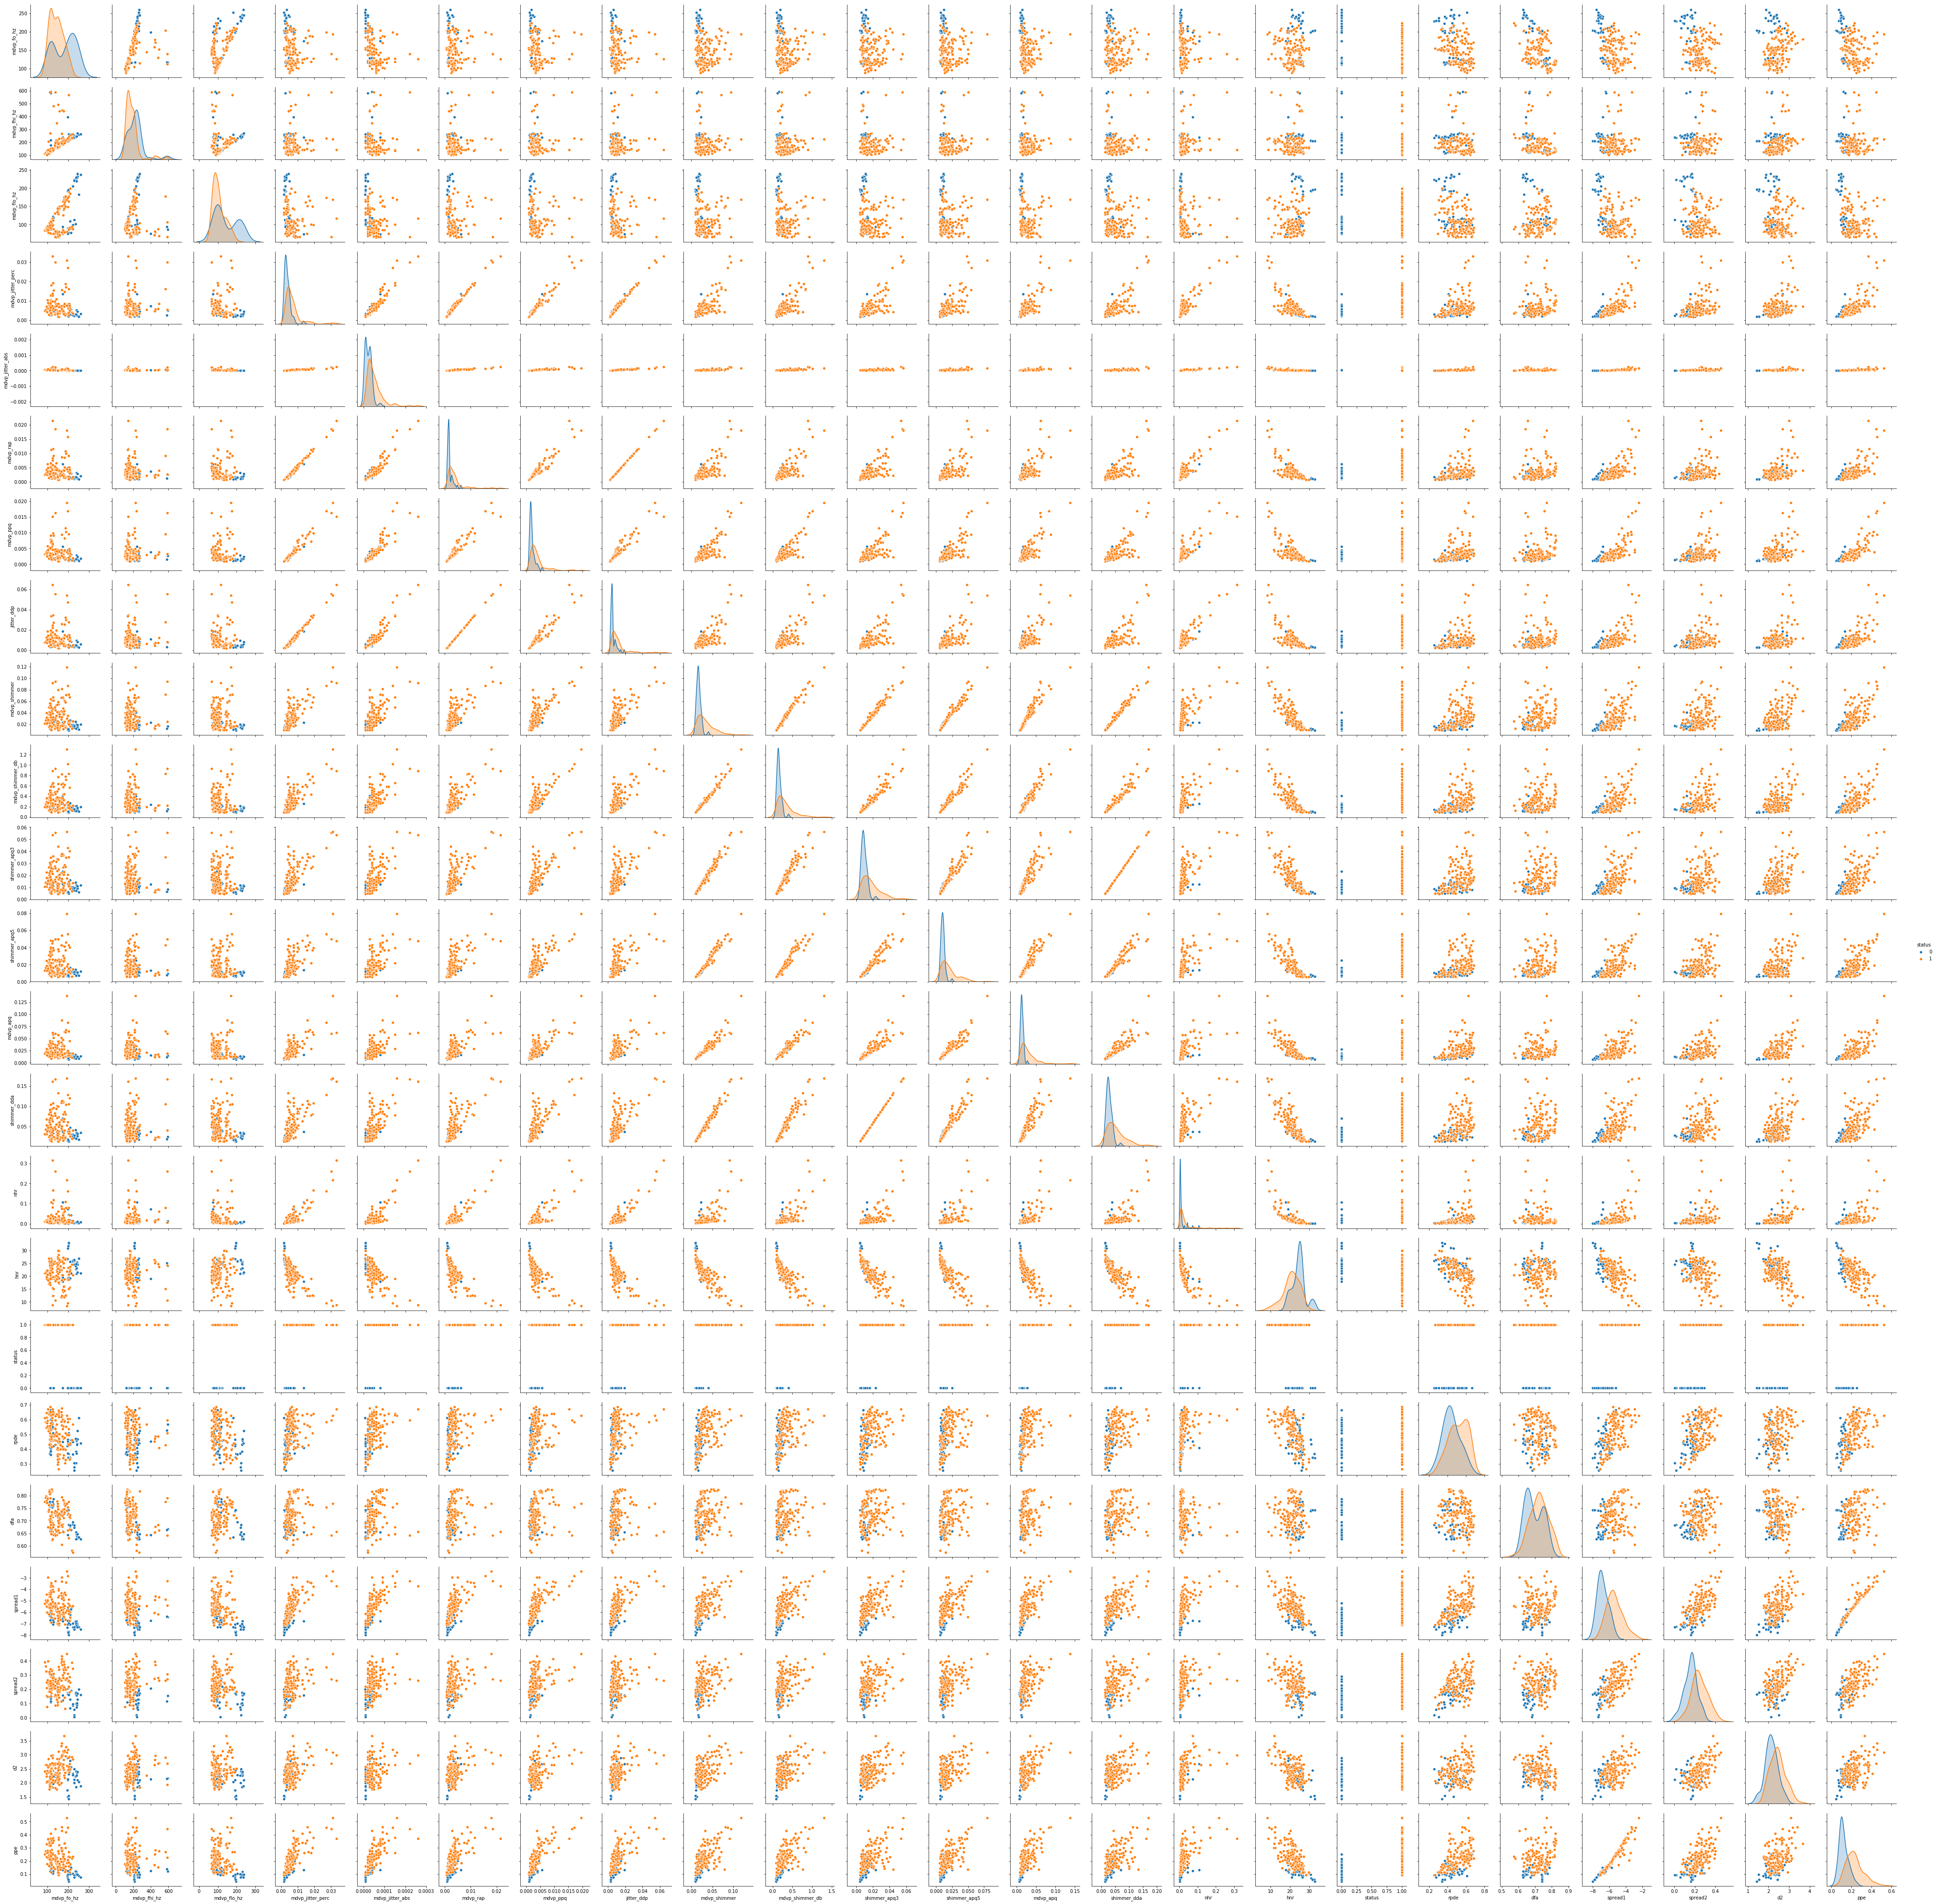

In [24]:
# 3. Comparing all Independent - Continous Variables using Pair Plot

sb.pairplot(data=pkd,hue='status')

<u>Observation from Univariate & Bivariate Analysis:</u>

1. A high correlation exists among most features in the dataframe. For example lets consider the feature mdvp_jitter_perc. It has a correlation greater than 0.7 with the following features.

2. Similarly the following features have high correlation with other features as well.<br/><br/>
    mdvp_jitter_abs<br/>mdvp_rap<br/>mdvp_ppq<br/>jitter_ddp<br/>mdvp_shimmer<br/>mdvp_shimmer_db<br/>shimmer_apq3<br/>shimmer_apq5<br/>mdvp_apq<br/>shimmer_dda<br/>nhr<br/>spread1<br/>ppe<br/><br/><br/>More analysis is required for feature selection, tuning and optimization. Since that is not part of this assignment, I have not covered it, considering the time constraints.<br/><br/>
3. From the box plots and the pair plot, it is evident that the data set contains outliers. Based on my research in MDVP and Praat's voice processing software inputs, I have found out that in both healthy people and Parkinson's victims, the natural vocal frequency of women are higher compared to men. Also, the frequency fluctuations a.k.a. jitter is high in men compared to women.<br/><br/>From the diagonal plots in the pairplot, it is evident that the MDVP Frequency features and the Jitter features have 2 bumps in their distribution. This could be due to the lack of gender information in the data set. The model will suffer to categorise a patient between positive and negative status for parkinson's due to the same reason.<br/><br/>The scatter plots show that the outliers mostly lie in the parkinson's positive data. Since the dataset is biased to contain 75% of information about Parkinsons's victims, eleminating the outliers could harm the model more than keeping them.<br/><br/>
4. The Noise to Harmony ratio [NHR] and the Harmony to Noise ratio [HNR] are hyperbolic curves and hence show an inverse proportionality.<br/><br/>
5.  MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ & Jitter:DDP have a linear relationship with each other and seem to have high correlation as well.<br/><br/>
6. Similarly, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ & Shimmer:DDA have a linear relationship with each other and seem to have high correlation as well.<br/><br/>
7. After considerable analysis on the data, the following features seems to offer more to the prediction since colinear features have been removed. MDVP:Fhi (Hz), MDVP:Flo (Hz), MDVP:Jitter(%), MDVP:Shimmer, NHR, HNR, RPDE, DFA, Spread1, Spread2, D2, PPE.

#### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [25]:
pkd.status = pkd.status.astype('category')
pkd.dtypes

mdvp_fo_hz           float64
mdvp_fhi_hz          float64
mdvp_flo_hz          float64
mdvp_jitter_perc     float64
mdvp_jitter_abs      float64
mdvp_rap             float64
mdvp_ppq             float64
jitter_ddp           float64
mdvp_shimmer         float64
mdvp_shimmer_db      float64
shimmer_apq3         float64
shimmer_apq5         float64
mdvp_apq             float64
shimmer_dda          float64
nhr                  float64
hnr                  float64
status              category
rpde                 float64
dfa                  float64
spread1              float64
spread2              float64
d2                   float64
ppe                  float64
dtype: object

In [26]:
from sklearn.model_selection import train_test_split
x = pkd.drop(columns=['status'])
x = x.apply(pp.minmax_scale)
y = pkd.status
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

In [27]:
print("X Train Shape:",x_train.shape)
print("X Test Shape:",x_test.shape)
print("Y Train Shape:",y_train.shape)
print("Y Test Shape:",y_test.shape)

X Train Shape: (136, 22)
X Test Shape: (59, 22)
Y Train Shape: (136,)
Y Test Shape: (59,)


#### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [28]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)
y_predicted = DTC.predict(x_test)

#### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [29]:
print("Accuracy Score:",DTC.score(x_test,y_test))

print("\nCross-Tab:\n\n",pd.crosstab(index=y_test,columns=y_predicted,rownames=['y_test'],colnames=['y_predicted']))

Accuracy Score: 0.8983050847457628

Cross-Tab:

 y_predicted   0   1
y_test             
1             6  40
0            13   0


#### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [30]:
max_depth_arr = []
min_sample_leaf_arr = []
acc_score_arr = []
for i in range(1,20):
    for j in range(1,10):
        DTC = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j,random_state=0,criterion='entropy')
        DTC.fit(x_train,y_train)
        max_depth_arr.append(i)
        min_sample_leaf_arr.append(j)
        acc_score_arr.append(DTC.score(x_test,y_test))
tree_desc = pd.DataFrame()
tree_desc['Max_Depth'] = max_depth_arr
tree_desc['Min_Sample_Leaf'] = min_sample_leaf_arr
tree_desc['Accuracy_Score'] = acc_score_arr
tree_desc.Accuracy_Score.sort_values(ascending=False).unique()

array([0.89830508, 0.86440678, 0.84745763, 0.83050847, 0.81355932,
       0.79661017])

In [31]:
tree_desc[tree_desc.Accuracy_Score>0.898306]

,Max_Depth,Min_Sample_Leaf,Accuracy_Score


#### <u>Impact of Regularization on Model Accuracy</u>
Please note that the accuracy for each model varies with respect to the choen max depth and min sample leaf hyper parameters. Reqularizing the hyper parameter to improve accurcy while avoiding overfitting is a method of model tuning.

In general, with adequate sample size, Regularization offers a wider variety of models to choose from. Since this data set is only 24 x 195 big, we are at a loss of performance with the concept of regularization 

#### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [32]:
from sklearn.ensemble import RandomForestClassifier
acc_score_arr =[]
n_estimators = []
for i in range(1,100):
    RFC = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    RFC.fit(x_train,y_train)
    score = RFC.score(x_test,y_test)
    acc_score_arr.append(score)
    n_estimators.append(i)
forest_desc = pd.DataFrame()
forest_desc['No_of_Estimators'] = n_estimators
forest_desc['Accuracy_Score'] = acc_score_arr

In [33]:
forest_desc.Accuracy_Score.sort_values(ascending=False).unique()

array([0.96610169, 0.94915254, 0.93220339, 0.91525424, 0.89830508,
       0.88135593, 0.83050847, 0.81355932])

In [34]:
forest_desc.sort_values(by='Accuracy_Score',ascending=False)

,No_of_Estimators,Accuracy_Score
80,81,0.966102
49,50,0.949153
12,13,0.949153
76,77,0.949153
77,78,0.949153
78,79,0.949153
79,80,0.949153
81,82,0.949153
82,83,0.949153
85,86,0.949153


With 81 Trees, the accuracy score really shoots up. 96.6% is pretty good for predicting Parkinson's disease.